1. Import required libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2. Set image size and directories

In [2]:
IMG_SIZE = (64, 64)  # Small size for fast training on laptop
BATCH_SIZE = 32

train_dir = '../dataset/train'
test_dir = '../dataset/test'

3. Data preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Two classes: Open, Closed
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


4. Build CNN model

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\Suyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5. Compile the model

In [5]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

6. Set callbacks & train

In [7]:
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('../model/drowsiness_model.keras', save_best_only=True)
]

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/10


C:\Users\Suyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 289ms/step - accuracy: 0.7311 - loss: 0.4936 - val_accuracy: 0.9737 - val_loss: 0.0733
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9711 - loss: 0.0880 - val_accuracy: 0.9925 - val_loss: 0.0409
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9863 - loss: 0.0495 - val_accuracy: 0.9912 - val_loss: 0.0340
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9905 - loss: 0.0290 - val_accuracy: 0.9912 - val_loss: 0.0266
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9927 - loss: 0.0257 - val_accuracy: 0.9962 - val_loss: 0.0132
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9963 - loss: 0.0154 - val_accuracy: 0.9975 - val_loss: 0.0104
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9954 - loss: 0.0141 - val_accuracy: 0.9987 - val_loss: 0.0083
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0.9

7. Plot training result

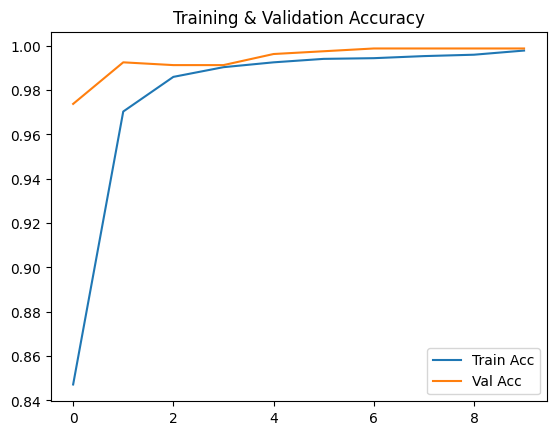

In [8]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()